(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                        

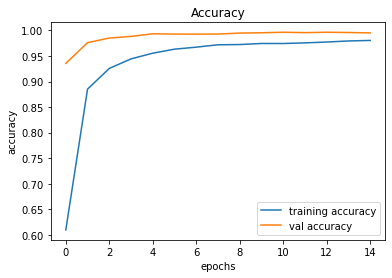

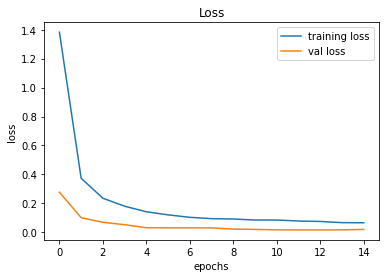

395/395 [==============================] - 4s 9ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 709   7 ...   0   0   0]
 [  0   3 739 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   9  80]]
Accuracy: 0.970150
Precision: 0.959958
Recall: 0.953390
F1 score: 0.954650


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        128       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        2112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                      

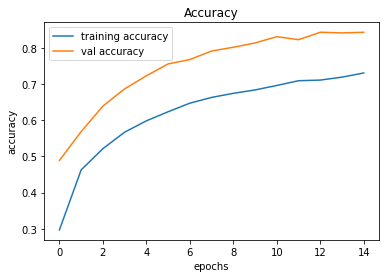

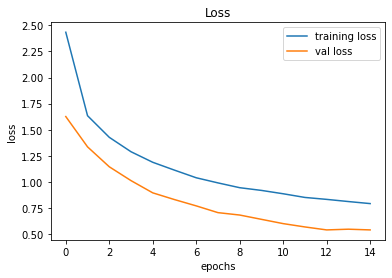

395/395 [==============================] - 3s 8ms/step
Confusion Matrix:
[[  0  39  20 ...   0   0   0]
 [  0 504 128 ...   0   0   0]
 [ 15 172 255 ...   0   0   0]
 ...
 [  0   0   0 ...  82   0   0]
 [  0   0   1 ...   0   6   4]
 [  0   0   0 ...   0  28  35]]
Accuracy: 0.685115
Precision: 0.665079
Recall: 0.599350
F1 score: 0.610640


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 21, 21, 32)        9632      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                      

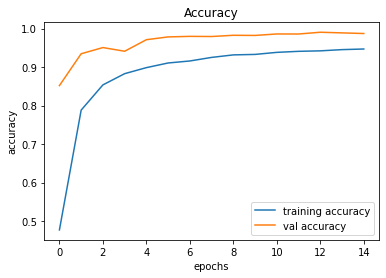

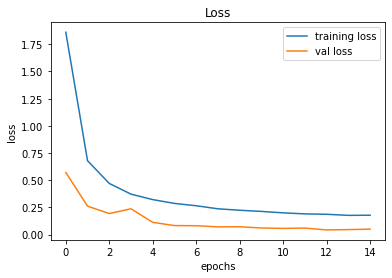

395/395 [==============================] - 5s 12ms/step
Confusion Matrix:
[[ 58   2   0 ...   0   0   0]
 [  1 671  25 ...  12   0   0]
 [  0   5 721 ...   0   0   0]
 ...
 [  0   0   0 ...  84   0   0]
 [  0   0   0 ...   0  50   0]
 [  0   0   0 ...   0   0  90]]
Accuracy: 0.941884
Precision: 0.932093
Recall: 0.921920
F1 score: 0.923914


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(10,10), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        2112      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                      

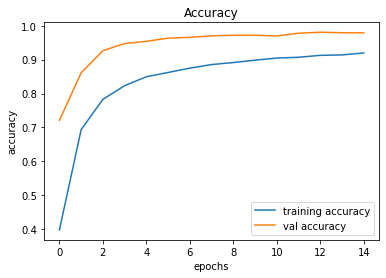

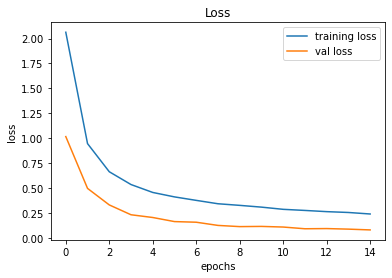

395/395 [==============================] - 4s 9ms/step
Confusion Matrix:
[[ 32  21   6 ...   0   0   0]
 [  1 625  75 ...   0   0   0]
 [  4  26 698 ...   0   0   0]
 ...
 [  0   0   0 ...  90   0   0]
 [  0   0   0 ...   0  42   3]
 [  0   0   0 ...   0   0  89]]
Accuracy: 0.903959
Precision: 0.898195
Recall: 0.885189
F1 score: 0.886044


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)

